# Testosterone (Serum) ELISA

In [1]:
from io import StringIO
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import interpolate, optimize

In [2]:
table = '''\
conc    smpl1    smpl2    smpl3
 0.0    1.976    1.593    1.496
 0.1    1.595    1.292    1.277
 0.5    0.964    0.815    0.934
 1.0    0.749    0.654    0.727
 2.5    0.531    0.459    0.474
 5.0    0.356    0.342    0.355
12.0    0.258    0.213    0.219
 NaN    0.695    0.590    0.686 # analyte
'''

io = StringIO(table)
data = pd.read_csv(io, sep='\s+',
                   index_col=0, comment='#')

standards = data.iloc[:-1] # df
test = data.iloc[-1] # series

In [3]:
def result(f, val):
  return optimize.newton(lambda x: f(x) - val, x0=0.5)

In [4]:
# interpolation
xs = np.linspace(min(standards.index), max(standards.index), 50)
interp = interpolate.PchipInterpolator(standards.index, standards.mean(axis=1).values,
                                       extrapolate=True)
ys = interp(xs)

In [5]:
# test result
test_value = test.mean()
test_result = result(interp, test_value)

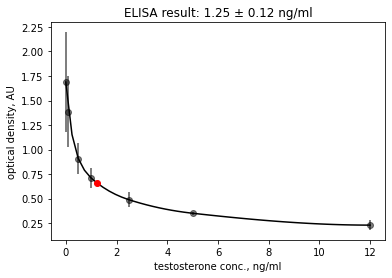

In [6]:
plt.plot(xs, ys, color='k') # standarts

plt.errorbar(x=standards.index, y=standards.mean(axis=1),
             yerr=2 * standards.std(axis=1), fmt='o',
             color='k', elinewidth=2,
             capsize=0, alpha=0.5)

plt.plot(test_result, test_value, 'ro') # analyte

plt.xlabel('testosterone conc., ng/ml')
plt.ylabel('optical density, AU')
plt.title(f'ELISA result: {test_result:.2f} ± {2 * test.std():.2f} ng/ml');